# Import packages

In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_validate , KFold , ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest, f_regression

import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

# Data Preprocessing

In [76]:
# Load data
data = pd.read_csv('data/unemployment_data.csv')
data

,Date,Unemployment_interpolated,Bank Interest Rate,Change_in_GDP,Unemployment,CPI_all-items,CPI_food,CPI_shelter,CPI_household_op,CPI_clothing,...,ITSE_transport,ITSE_gov,ITSB_total,ITSB_commercial,ITSB_travel,ITSB_transport,ITSB_gov,HPI_total,HPI_house,HPI_land
0,1976-01,7.100,9.000000,4.673333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1976-02,7.175,9.000000,6.036667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1976-03,7.250,9.391304,7.400000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1976-04,7.325,9.500000,7.770000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1976-05,7.400,9.500000,8.140000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,2023-10,NaN,5.250000,NaN,5.3,158.6,186.3,176.3,131.2,95.9,...,1697.0,150.0,43.0,175.0,1132.0,-1257.0,-7.0,124.7,127.6,116.9
574,2023-11,NaN,5.250000,NaN,5.3,159.0,186.8,177.1,131.1,96.4,...,1560.0,147.0,-482.0,248.0,651.0,-1375.0,-7.0,124.4,127.2,116.8
575,2023-12,NaN,5.250000,NaN,5.3,159.5,187.6,177.8,130.8,96.9,...,1615.0,146.0,319.0,528.0,949.0,-1152.0,-6.0,124.4,127.2,116.8
576,2024-01,NaN,5.250000,NaN,6.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 84 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       578 non-null    object 
 1   Unemployment_interpolated  565 non-null    float64
 2   Bank Interest Rate         578 non-null    float64
 3   Change_in_GDP              573 non-null    float64
 4   Unemployment               157 non-null    float64
 5   CPI_all-items              384 non-null    float64
 6   CPI_food                   384 non-null    float64
 7   CPI_shelter                384 non-null    float64
 8   CPI_household_op           384 non-null    float64
 9   CPI_clothing               384 non-null    float64
 10  CPI_transportation         384 non-null    float64
 11  CPI_health                 384 non-null    float64
 12  CPI_rec                    384 non-null    float64
 13  CPI_alcohol                384 non-null    float64

In [78]:
# Drop FEX columns because there is insufficient data
data = data.drop(data.filter(regex='^FEX').columns, axis=1)

# Drop Unemployment_interpolated (for now)
data = data.drop('Unemployment_interpolated', axis=1)

# Convert 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])  
data.set_index('Date', inplace=True)

# Remove NaN
data.dropna(how='any', inplace=True)
pd.set_option('display.max_rows', 15)
data

,Bank Interest Rate,Change_in_GDP,Unemployment,CPI_all-items,CPI_food,CPI_shelter,CPI_household_op,CPI_clothing,CPI_transportation,CPI_health,...,ITSE_transport,ITSE_gov,ITSB_total,ITSB_commercial,ITSB_travel,ITSB_transport,ITSB_gov,HPI_total,HPI_house,HPI_land
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1.250000,4.053333,8.3,118.4,124.6,124.5,109.8,91.0,123.2,116.0,...,940.0,128.0,-2330.0,315.0,-1766.0,-897.0,18.0,88.6,87.0,92.1
2011-02-01,1.250000,3.516667,8.2,118.3,124.7,124.5,109.8,90.5,123.3,116.2,...,890.0,130.0,-1874.0,353.0,-1434.0,-813.0,20.0,89.0,87.3,92.4
2011-03-01,1.250000,2.980000,8.4,119.1,126.8,124.6,110.3,91.6,124.2,116.7,...,1027.0,129.0,-3060.0,379.0,-2457.0,-1003.0,21.0,89.0,87.4,92.3
2011-04-01,1.250000,2.240000,8.2,119.6,127.0,125.2,109.6,90.9,125.7,116.9,...,1048.0,125.0,-3128.0,253.0,-2397.0,-1005.0,21.0,89.2,87.8,92.4
2011-05-01,1.250000,1.500000,7.7,120.0,127.5,125.2,110.2,92.3,126.6,116.9,...,1157.0,125.0,-2232.0,279.0,-1689.0,-844.0,22.0,89.6,88.2,92.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,4.750000,1.723333,5.2,156.1,184.0,170.6,132.6,96.4,165.8,145.7,...,1663.0,152.0,-3172.0,500.0,-2319.0,-1355.0,1.0,124.9,128.3,116.6
2023-06-01,4.943182,1.350000,5.2,156.5,184.5,171.4,132.0,96.3,167.4,146.2,...,1738.0,153.0,-921.0,703.0,-472.0,-1151.0,-1.0,125.0,128.3,116.7
2023-07-01,5.162500,0.550000,5.9,157.4,185.1,172.6,131.7,96.5,169.2,146.3,...,1801.0,156.0,-1344.0,452.0,-794.0,-996.0,-6.0,124.9,128.2,116.7


# Plot Unemployment Data over Time

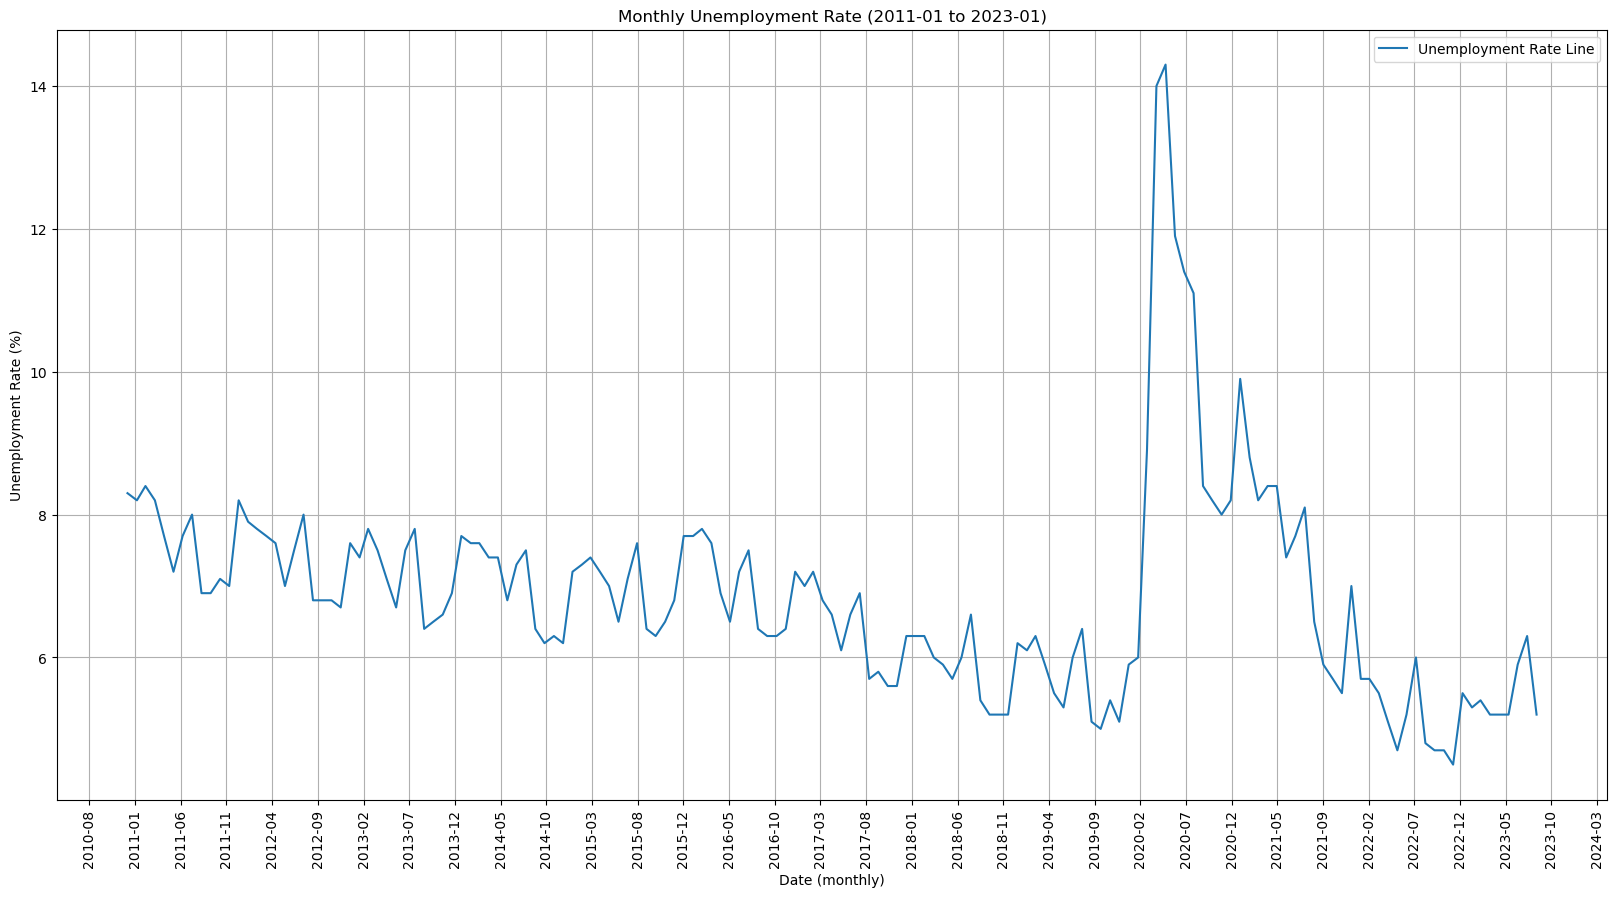

In [79]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(data.index,data["Unemployment"],label='Unemployment Rate Line')
# plt.xticks(df["ds"],rotation=90)

ax.set(xlabel='Date (monthly)', ylabel='Unemployment Rate (%)',
       title='Monthly Unemployment Rate (2011-01 to 2023-01)')
ax.grid(True)
plt.legend()

plt.xticks(data.index,rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=50))  # Adjust the number of bins as needed

plt.show()

# Split the data

In [80]:
y = data['Unemployment']
X = data.drop(['Unemployment'],axis=1)

# No shuffle. The beginning 80% of the data is used for training. The last 20% of the data is used for testing. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=False)



# Feature Selection


## Filter Methods - Univariate Feature Selection 
F-Test for Linear Regression. Use f_regression as the scoring function

In [81]:
# Initiate the SelectKBest model with k=5
model_fr = SelectKBest(score_func=f_regression, k=10)

# Fit the model to all data
data_new = model_fr.fit(X, y)

# Get the scores of all features
scores = data_new.scores_

# Get the indices of the selected features
selected_features_indices = data_new.get_support(indices=True)

# Sort the selected features based on their scores
sorted_features_indices = np.argsort(scores[selected_features_indices])[::-1]

# Get the names of the top 5 most significant features
top_10_features = list(X.columns[selected_features_indices[sorted_features_indices]])

print("Top 10 most significant features (in order of significance):")
for i, feature in enumerate(top_10_features, 1):
    print(f"{i}) {feature}")

Top 10 most significant features (in order of significance):
1) ITSE_gov
2) ITSI_transport
3) ITSE_travel
4) ITSE_transport
5) IMT_export
6) IMT_import
7) ITSB_transport
8) CPI_clothing
9) GDP
10) ITSI_total


# Predict Unemployment using only most significant feature (ITSE_gov)
## Find the best polynomial model degree using 5-Fold CV

In [82]:
MSEs = []
# Fit model and collect performance iteratively
for i in range(1,21):
    # Fit a Linear Regression model
    poly   = PolynomialFeatures (degree=i, include_bias=False)
    X_poly = poly.fit_transform(X['ITSE_gov'].to_numpy().reshape(-1,1))
    
    model = LinearRegression()
    cv_results = cross_validate(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate performance
    mse_avg = -cv_results['test_score'].mean()
    MSEs.append(mse_avg)    

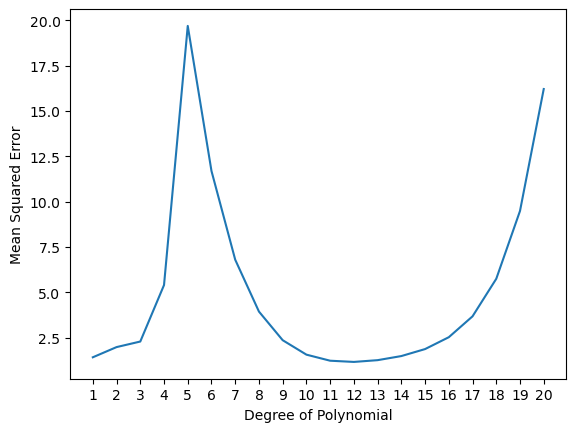

In [83]:
# Plot MSE vs Degree of Polynomial
MSEs = pd.DataFrame(MSEs, index=range(1,21), columns=['MSE'])

MSEs.plot(legend=False)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 21, 1))  # Setting xticks to range from 1 to 20 by 1
plt.show()



In [84]:
# Determine the degree that gives the minimum MSE
min_mse_degree = MSEs['MSE'].idxmin()
MSEs[MSEs['MSE'] == MSEs['MSE'].min()]


,MSE
12,1.164118


## Plot the fit of polynomial regression

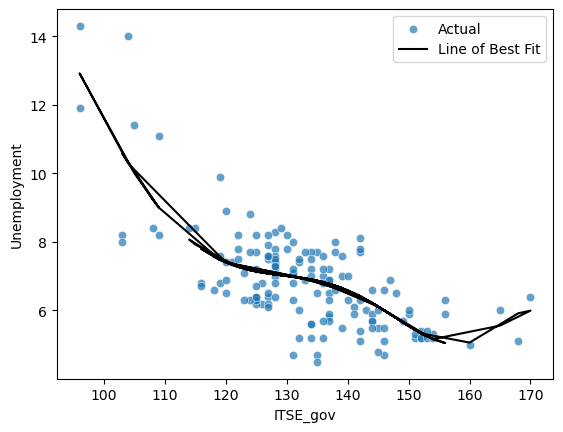

In [85]:
# Fit the model based in the degree that gives minimum MSE
poly         = PolynomialFeatures (degree=min_mse_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train['ITSE_gov'].to_numpy().reshape(-1,1))

lm = LinearRegression()
lm = lm.fit(X_train_poly, y_train)

x    = poly.transform(X['ITSE_gov'].to_numpy().reshape(-1,1))
preds = lm.predict(x)


# Plot the scatterplot
sns.scatterplot(data=data, x="ITSE_gov", y="Unemployment", label='Actual', alpha=0.7)


# Add predictions
plt.plot(X[['ITSE_gov']],preds,c='black', label="Line of Best Fit")

plt.legend(['Actual', 'Line of Best Fit'])



In [86]:
# Predict unemployment on the test set
x_test     = poly.transform(X_test['ITSE_gov'].to_numpy().reshape(-1,1))
test_preds = lm.predict(x_test)

pred_based_on_ITSE_gov = pd.DataFrame(index=X_test.index, data=test_preds, columns=['Predicted_Unemployment_Based_on_ITSE_gov'])
pred_based_on_ITSE_gov

,Predicted_Unemployment_Based_on_ITSE_gov
Date,
2021-03-01,7.269585
2021-04-01,7.923885
2021-05-01,8.068025
2021-06-01,7.399616
2021-07-01,6.936659
...,...
2023-05-01,5.335261
2023-06-01,5.243037
2023-07-01,5.049002


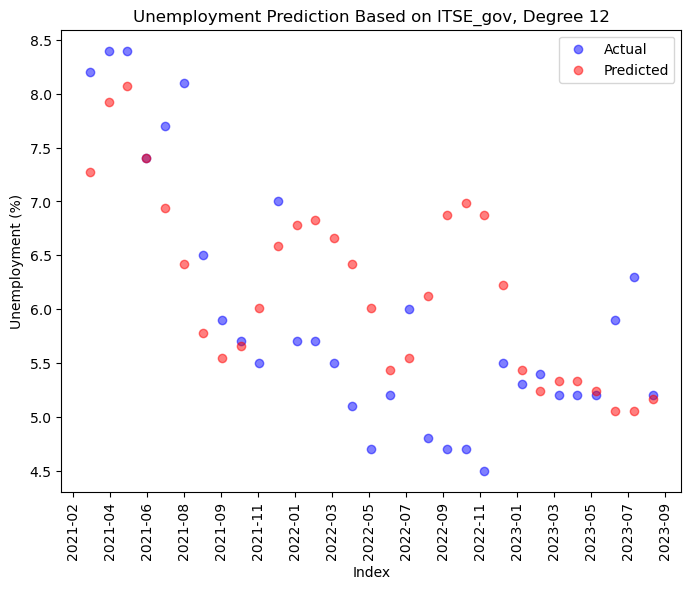

In [87]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(pred_based_on_ITSE_gov.index, pred_based_on_ITSE_gov, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Unemployment (%)')
plt.title(f"Unemployment Prediction Based on ITSE_gov, Degree {min_mse_degree}")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Adjust the number of bins as needed

plt.xticks(rotation=90)


plt.show()



# Predict Unemployment by Multiple Linear Regression

In [88]:
# Try Forward Selection of top 10 features



# Initialize Linear Regression model
model = LinearRegression()

# Forward Selection
sfs_forward = SFS(model, 
                  k_features='best', #  the algorithm will select the number of features that leads to the best performance (based on the scoring metric and cross-validation)
                  forward=True, 
                  floating=False, 
                  scoring='neg_mean_squared_error',
                  cv=5)

# Fit the model
sfs_forward = sfs_forward.fit(X_train[top_10_features], y_train)

print('Best subset:', sfs_forward.k_feature_names_)

features_selected = list(sfs_forward.k_feature_names_)

Best subset: ('ITSI_transport', 'ITSE_travel', 'ITSE_transport', 'IMT_export', 'ITSB_transport', 'CPI_clothing', 'ITSI_total')


In [89]:
MSEs = []

# Fit model and collect performance iteratively
for i in range(1,11):
    # Fit a Linear Regression model
    poly   = PolynomialFeatures (degree=i, include_bias=False)
    X_poly = poly.fit_transform(X[features_selected])
    
    model = LinearRegression()
    cv_results = cross_validate(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate performance
    mse_avg = -cv_results['test_score'].mean()
    MSEs.append(mse_avg)

In [90]:
MSEs = pd.DataFrame(MSEs, index=range(1,11), columns=['MSE'])
MSEs

,MSE
1,1.741342e+00
2,5.557676e+00
3,3.544683e+02
4,9.276082e+03
5,8.609996e+03
6,1.696798e+04
7,4.434313e+04
8,1.311693e+05
9,4.266015e+05
10,1.480929e+06


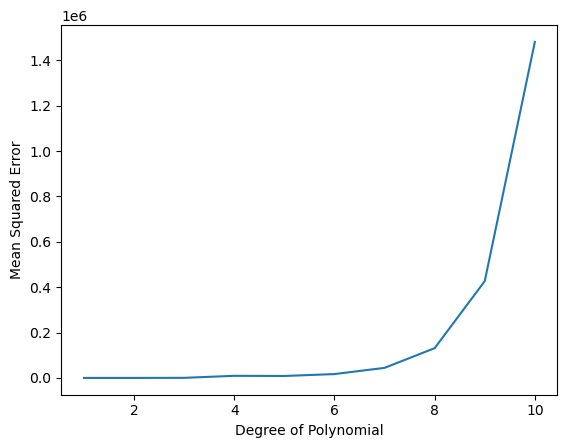

In [91]:
MSEs.plot(legend=False)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.show()

In [92]:
# Determine degree that produces the minimum MSE
min_mse_degree = MSEs['MSE'].idxmin()
min_mse_degree


1

In [93]:
poly         = PolynomialFeatures (degree=min_mse_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train[features_selected])

lm = LinearRegression()
lm = lm.fit(X_train_poly, y_train)

x_test    = poly.transform(X_test[features_selected])
test_preds = lm.predict(x_test)

pred_multi = pd.DataFrame(index=X_test.index, data=test_preds, columns=['Predicted_Unemployment_Multiple_LinReg'])
pred_multi



,Predicted_Unemployment_Multiple_LinReg
Date,
2021-03-01,7.606071
2021-04-01,7.852403
2021-05-01,9.096861
2021-06-01,9.149843
2021-07-01,7.989049
...,...
2023-05-01,7.500035
2023-06-01,6.906879
2023-07-01,7.420971


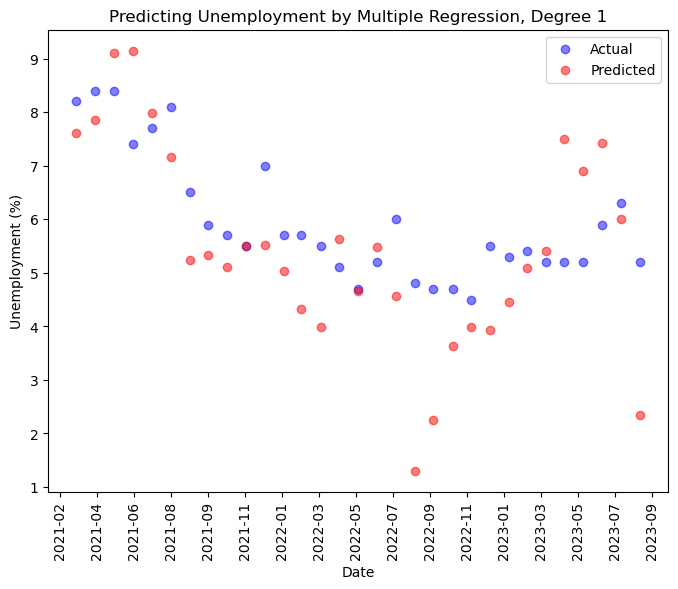

In [94]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(pred_multi.index, pred_multi, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Unemployment (%)')
plt.title(f"Predicting Unemployment by Multiple Regression, Degree {min_mse_degree}")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Adjust the number of bins as needed
plt.xticks(rotation=90)
plt.show()

In [95]:
#get multiple regression performance metrics
mse = mean_squared_error(y_test, pred_multi)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_multi)
mape = mean_absolute_percentage_error(y_test, pred_multi)
r2 = r2_score(y_test, pred_multi)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1.8827137217517729
Root Mean Squared Error (RMSE): 1.3721201557268128
Mean Absolute Error (MAE): 1.0876890109252753
Mean Absolute Percentage Error (MAPE): 0.19408531693414344
R-squared (R2): -0.4044431144361029


In [96]:
#store multiple regression data
multiple_regression_data = {
    'model': lm,
    'pred': pred_multi,
    'stats' : {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mape': mape
    }
}

# Improving Using Larger Subset, Regularization and Hyperparamter Tuning

In [97]:
# Try Forward Selection of all features

# Initialize Linear Regression model
model = LinearRegression()

# Forward Selection
sfs_forward = SFS(model, 
                  k_features='best', #  the algorithm will select the number of features that leads to the best performance (based on the scoring metric and cross-validation)
                  forward=True, 
                  floating=False, 
                  scoring='neg_mean_squared_error',
                  cv=5)

# Fit the model
sfs_forward = sfs_forward.fit(X_train, y_train)

print('Best subset:', sfs_forward.k_feature_names_)

best_subset_features = list(sfs_forward.k_feature_names_)

Best subset: ('Bank Interest Rate', 'Change_in_GDP', 'CPI_food', 'CPI_household_op', 'CPI_clothing', 'GDP', 'AWE_forestry', 'AWE_mining', 'AWE_utilities', 'AWE_manufacturing', 'AWE_trade', 'AWE_transport', 'AWE_info-and-culture', 'AWE_finance', 'AWE_real-estate', 'AWE_professional', 'AWE_education', 'AWE_arts', 'IMT_import', 'IMT_export', 'IMT_trade-bal', 'ITSI_total', 'ITSI_transport', 'ITSE_travel', 'ITSE_transport', 'ITSB_transport')


In [98]:
#check different lasso alpha values
alpha_values = np.arange(0, 100.1, 0.1).tolist()
lasso_mse_values = []
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train[best_subset_features], y_train)
    lasso_test_preds = lasso_model.predict(X_test[best_subset_features])

    mse = mean_squared_error(y_test, lasso_test_preds)
    lasso_mse_values.append(mse)

#output mses of different alpha values
print(lasso_mse_values)

[3.6831774373842596, 4.747106978282824, 4.9583244718213075, 5.187675968330403, 5.4294024538437515, 5.668407960644869, 5.82831250871053, 5.990068083334331, 6.154855883760925, 6.322690653932771, 6.492476795723544, 6.647504402926743, 6.587960904898983, 6.528933494098949, 6.470263625022433, 6.411953560731272, 6.354004971577522, 6.296416483386098, 6.224202089323379, 6.148664059930655, 6.0818794204039115, 6.022457617805575, 5.963360687104703, 5.904589080306057, 5.846141958071302, 5.788022267675628, 5.730229092934676, 5.672762069844451, 5.615624747201237, 5.55881006128295, 5.502326878627482, 5.446170303145041, 5.390337583870353, 5.3348305259079565, 5.27964884153466, 5.22478833080607, 5.17024683060144, 5.116107452625164, 5.062574554605475, 5.011983037053287, 4.966161654189839, 4.917288754146222, 4.868702677202066, 4.820403447534921, 4.772391358426808, 4.724691636648068, 4.677297757356556, 4.630191475205961, 4.583372468077429, 4.536840376772303, 4.490595953305139, 4.444638712502563, 4.398968766

optimal Alpha: 26.3


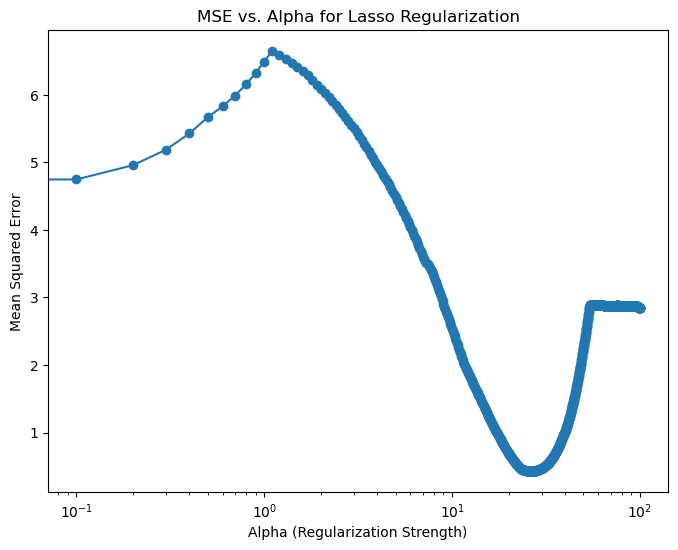

In [99]:
#optimal alpha
optimal_alpha = alpha_values[np.argmin(lasso_mse_values)]
print(f"optimal Alpha: {optimal_alpha}")

#graph for different alpha values
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, lasso_mse_values, marker='o')
plt.xscale('log')  
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Alpha for Lasso Regularization')
plt.show()




In [100]:
# fit lasso model with best alpha
final_lasso_model = Lasso(alpha=optimal_alpha)
final_lasso_model.fit(X_train[best_subset_features], y_train)

# predict lasso against 
final_lasso_test_preds = final_lasso_model.predict(X_test[best_subset_features])
final_pred_lasso = pd.DataFrame(index=X_test.index, data=final_lasso_test_preds, columns=['Predicted_Unemployment_Final_Lasso'])



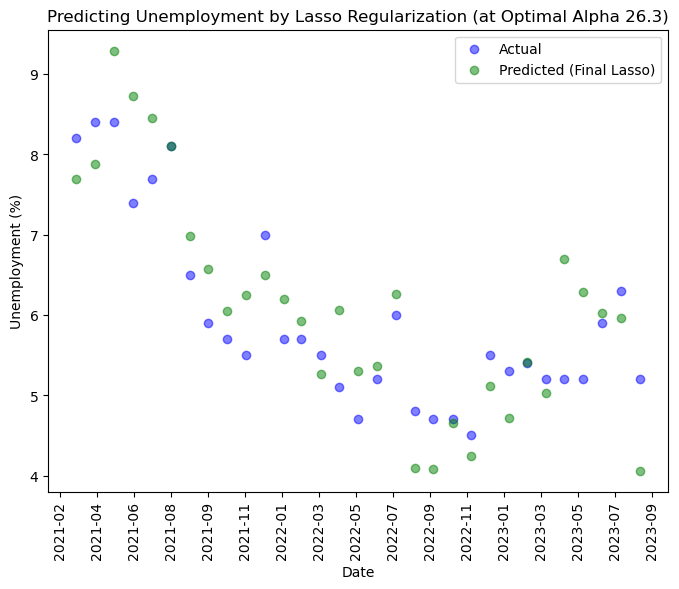

In [101]:
# plot performance against test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(final_pred_lasso.index, final_pred_lasso, color='green', label='Predicted (Final Lasso)', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Unemployment (%)')
plt.title(f"Predicting Unemployment by Lasso Regularization (at Optimal Alpha {optimal_alpha})")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)
plt.show()

In [102]:
# calculate performance metrics
mse = mean_squared_error(y_test, final_pred_lasso)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, final_pred_lasso)
mape = mean_absolute_percentage_error(y_test, final_pred_lasso)
r2 = r2_score(y_test, final_pred_lasso)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared (R2): {r2}")



Mean Squared Error (MSE): 0.42947904271214754
Root Mean Squared Error (RMSE): 0.6553465058365289
Mean Absolute Error (MAE): 0.5372324442876238
Mean Absolute Percentage Error (MAPE): 0.09272729533781997
R-squared (R2): 0.6796226227264885


In [103]:
#store lasso data
lasso_data = {
    'model': final_lasso_model,
    'pred': final_pred_lasso,
    'stats' : {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mape': mape
    }
}

In [104]:
#check different lasso alpha values
alpha_values = np.arange(0, 5000.1, 1).tolist()
ridge_mse_values = []

for alpha in alpha_values:

    #fit model and check mse
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train[best_subset_features], y_train)
    ridge_test_preds = ridge_model.predict(X_test[best_subset_features])
    mse = mean_squared_error(y_test, ridge_test_preds)
    ridge_mse_values.append(mse)

#output mses of different alpha values
print(ridge_mse_values)

[3.5437307854399007, 4.009727508881831, 4.346329663407827, 4.609755344818618, 4.814986635521235, 4.976422731576542, 5.104910265301052, 5.20829370001231, 5.292256835905301, 5.360973124231608, 5.417556633942547, 5.46436840126992, 5.503225508512204, 5.535545659072277, 5.56244874038268, 5.584829331395471, 5.603409282272339, 5.618776407669107, 5.631413351657037, 5.641719395817527, 5.650027128363834, 5.656615323562996, 5.661718992278842, 5.665537297400929, 5.6682398408298456, 5.669971697088222, 5.6708574723724325, 5.671004600926897, 5.670506038699715, 5.669442477687826, 5.66788417673495, 5.665892482519951, 5.6635211002847266, 5.660817159506276, 5.657822112238084, 5.654572492887005, 5.651100563802776, 5.647434865626587, 5.643600688011146, 5.639620473789797, 5.63551416691531, 5.631299512910574, 5.626992319157401, 5.622606680823256, 5.618155177695032, 5.613649045810439, 5.609098327643734, 5.604512003955377, 5.599898109326945, 5.595263834186817, 5.590615614521979, 5.585959211457703, 5.5812997814

optimal Alpha: 0.0


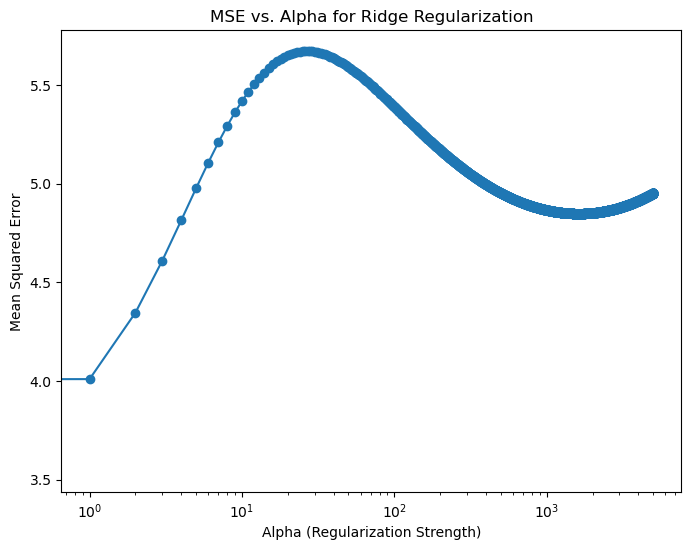

In [105]:
# find optimal ridge alpha
optimal_alpha = alpha_values[np.argmin(ridge_mse_values)]
print(f"optimal Alpha: {optimal_alpha}")

#graph for different alpha values
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, ridge_mse_values, marker='o')
plt.xscale('log')  
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Alpha for Ridge Regularization')
plt.show()



In [106]:

#fit ridge model with best alpha
final_ridge_model = Ridge(alpha=optimal_alpha)
final_ridge_model.fit(X_train[best_subset_features], y_train)

#predict for test set
final_ridge_test_preds = final_ridge_model.predict(X_test[best_subset_features])
final_pred_ridge = pd.DataFrame(index=X_test.index, data=final_ridge_test_preds, columns=['Predicted_Unemployment_Final_Ridge'])



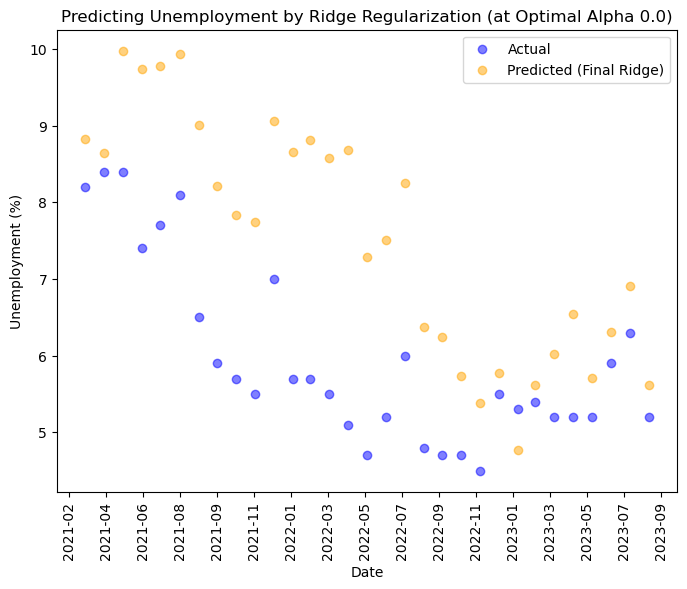

In [107]:
#plot performance against test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(final_pred_ridge.index, final_pred_ridge, color='orange', label='Predicted (Final Ridge)', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Unemployment (%)')
plt.title(f"Predicting Unemployment by Ridge Regularization (at Optimal Alpha {optimal_alpha})")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)
plt.show()

In [108]:
#get ridge performance metrics
mse = mean_squared_error(y_test, final_pred_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, final_pred_ridge)
mape = mean_absolute_percentage_error(y_test, final_pred_ridge)
r2 = r2_score(y_test, final_pred_ridge)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared (R2): {r2}")



Mean Squared Error (MSE): 3.5437307854399007
Root Mean Squared Error (RMSE): 1.8824799561854306
Mean Absolute Error (MAE): 1.6117200017219182
Mean Absolute Percentage Error (MAPE): 0.2797758007035352
R-squared (R2): -1.6435077428529525


In [109]:
#store ridge data
ridge_data = {
    'model': final_ridge_model,
    'pred': final_pred_ridge,
    'stats' : {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mape': mape
    }
}

# Comparing Models

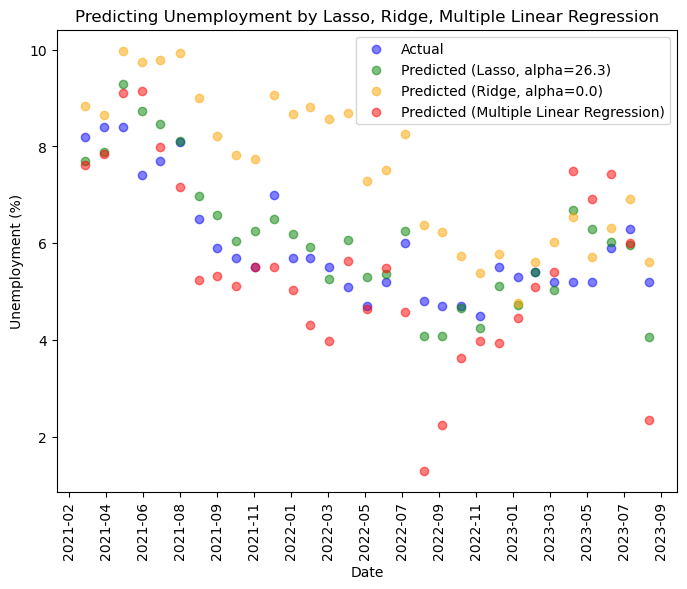

In [110]:

#ploting the different regression models
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(lasso_data['pred'].index, lasso_data['pred'], color='green', label=f"Predicted (Lasso, alpha={lasso_data['model'].alpha})", alpha=0.5)
plt.scatter(ridge_data['pred'].index, ridge_data['pred'], color='orange', label=f"Predicted (Ridge, alpha={ridge_data['model'].alpha})", alpha=0.5)
plt.scatter(multiple_regression_data['pred'].index, multiple_regression_data['pred'], color='red', label='Predicted (Multiple Linear Regression)', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Unemployment (%)')
plt.title("Predicting Unemployment by Lasso, Ridge, Multiple Linear Regression")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)
plt.show()


In [111]:
lasso_model_name = 'Lasso Regression'
multiple_model_name = 'Multiple Linear Regression'

lasso_stats = lasso_data['stats']
ridge_stats = ridge_data['stats']
multiple_stats = multiple_regression_data['stats']

metric_names = list(lasso_stats.keys())

summary_table = pd.DataFrame({
    'Metric': metric_names,
    'Lasso Regression': [lasso_stats[metric] for metric in metric_names],
    'Ridge Regression': [ridge_stats[metric] for metric in metric_names],
    'Multiple Linear Regression': [multiple_stats[metric] for metric in metric_names]

})

print("\nSummary Table:")
print(summary_table)


Summary Table:
  Metric  Lasso Regression  Ridge Regression  Multiple Linear Regression
0    mse          0.429479          3.543731                    1.882714
1   rmse          0.655347          1.882480                    1.372120
2    mae          0.537232          1.611720                    1.087689
3     r2          0.679623         -1.643508                   -0.404443
4   mape          0.092727          0.279776                    0.194085
